# 11. Pemodelan Estimasi berbasis Regresi

Kasus yang ditangani: Mengestimasi harga pangan dalam beberapa periode waktu mendatang di Kota Semarang di HARI INI
Pendekatan regresi akan digunakan untuk melakukan estimasi, dimana fungsi regresi secara umum berbentuk

#                                                        y = f(X)

dimana f(X) adalah suatu fungsi pengestimasi yang dapat berbentuk liner, non-linier, polinomial, tree, forest, dll

Untuk kasus yang kami fokuskan, kami memilih pendekatan regresi linear berganda, dimana

y = harga pangan p di KOTA SEMARANG pada HARI INI, dan 

X = {x1, x2, x3, x4, x5} adalah himpunan harga pangan di lima pasar-pasar di jawa tengah. tiap xi memiliki dua harga, xi.1 harga kemarin, dan xi.2 harga hari ini

# 11.1 Prapemrosesan Data
Tahap ini dilakukan untuk memilih harga produk KEMARIN di PASAR-PASAR sekitar SEMARANG

In [1]:
# Inisialisasi, panggil semua library
import os
import datetime
import pandas as pd
import numpy as np

In [17]:
path = 'Data Tugas Akhir/'
list_nf = [] # List berisi nama file
for root, dirs, files in os.walk(path):
    for file in files:
        if (file.endswith('xls')):
            fn = root + '/' + file 
            list_nf.append(fn) #tambahkan file xls saja ke list nf

In [18]:
# Ekstrak tanggal dari nama file
def ekstrak_tanggal_dari_nf(fn):
    root, dir, namafile = fn.split('/')
    tanggal_file, ext = namafile.split('.')
    if ext != 'xls':
        print(fn, ' bukan file excel, diskip')
        return ''
    array_tanggal = tanggal_file.split('-')
    try:
        if (len(array_tanggal) > 3):
            print(namafile, 'tanggal filenya janggal (panjangnya: ', len(array_tanggal), '), diskip')
            return ''
        else:
            print(namafile, 'OK')
    except Exception as e:
        print(namafile, " ada error: "+ str(IOError) + ' file diskip')
        tanggal_file = ''
    return tanggal_file

In [20]:
# Cara penggunaan
for i in range(1,5):
    ekstrak_tanggal_dari_nf(list_nf[i])

04-08-2020.xls OK
05-08-2020.xls OK
06-08-2020.xls OK
07-08-2020.xls OK


In [5]:
# Ambil satu file pertama di list, untuk dibuat DF dan headernya
print('file diolah: ', list_nf[0])
dfr = (pd.read_excel(list_nf[0], skiprows=3))
dfr

file diolah:  Data Tugas Akhir/Agustus 2020/03-08-2020.xls


,No.,Nama Barang,Satuan,Pasar Karangayu,Unnamed: 4,Perubahan,Unnamed: 6,Pasar. Johar MAJT,Unnamed: 8,Perubahan.1,...,Perubahan.3,Unnamed: 18,Pasar Bulu,Unnamed: 20,Perubahan.4,Unnamed: 22,KOTA SEMARANG,Unnamed: 24,Perubahan.5,Unnamed: 26
0,NaN,NaN,NaN,Kemarin,Hari ini,Rp.,%,Kemarin,Hari ini,Rp.,...,Rp.,%,Kemarin,Hari ini,Rp.,%,Kemarin,Hari ini,Rp.,%
1,NaN,BAHAN POKOK,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,BERAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,- IR64 (kw premium),kg,12500,12500,0,0,12000,12000,0,...,0,0,12000,12000,0,0,12100,12100,0,0
4,NaN,- IR64 (kw medium),kg,10000,10000,0,0,10000,10000,0,...,0,0,10000,10000,0,0,10140,10140,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,NaN,- Jagung,kg,60000,60000,0,0,60000,60000,0,...,0,0,60000,60000,0,0,60000,60000,0,0
110,NaN,- Kedelai,kg,20000,20000,0,0,20000,20000,0,...,0,0,20000,20000,0,0,20000,20000,0,0
111,9,"BAJA RINGAN (0,75mm)",batang,80000,80000,0,0,74000,74000,0,...,0,0,80000,80000,0,0,79800,79800,0,0
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Terlihat ada lima pasar di jawa tengah yang diasumsikan mempengaruhi harga bahan pangan di kota semarang
# 1. Pasar Karangayu
# 2. Pasar Johar MAJT
# 3. Pasar Gayamsari
# 4. Pasar Peterongan
# 5. Pasar Bulu
# Ambil harga kemarin di pasar-pasar ini, dan harga kemarin dan hari ini kota semarang

In [7]:
# Ganti NaN dengan zero
dfr.fillna(0)

,No.,Nama Barang,Satuan,Pasar Karangayu,Unnamed: 4,Perubahan,Unnamed: 6,Pasar. Johar MAJT,Unnamed: 8,Perubahan.1,...,Perubahan.3,Unnamed: 18,Pasar Bulu,Unnamed: 20,Perubahan.4,Unnamed: 22,KOTA SEMARANG,Unnamed: 24,Perubahan.5,Unnamed: 26
0,0,0,0,Kemarin,Hari ini,Rp.,%,Kemarin,Hari ini,Rp.,...,Rp.,%,Kemarin,Hari ini,Rp.,%,Kemarin,Hari ini,Rp.,%
1,0,BAHAN POKOK,0,,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,BERAS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,- IR64 (kw premium),kg,12500,12500,0,0,12000,12000,0,...,0,0,12000,12000,0,0,12100,12100,0,0
4,0,- IR64 (kw medium),kg,10000,10000,0,0,10000,10000,0,...,0,0,10000,10000,0,0,10140,10140,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,- Jagung,kg,60000,60000,0,0,60000,60000,0,...,0,0,60000,60000,0,0,60000,60000,0,0
110,0,- Kedelai,kg,20000,20000,0,0,20000,20000,0,...,0,0,20000,20000,0,0,20000,20000,0,0
111,9,"BAJA RINGAN (0,75mm)",batang,80000,80000,0,0,74000,74000,0,...,0,0,80000,80000,0,0,79800,79800,0,0
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def buat_kamus_kode_barang(list_namafile, df_master):
    Dict_Kode_Nama_Index_barang = {}
    Dict_Nama_Kode = {}
    kode_barang = ''
    jenis_barang = ''
    konter = 0
    for nama_file in list_namafile:
        print('buka file: ', nama_file)
        df = (pd.read_excel(nama_file, skiprows=3))
        tanggal_data_diambil = ekstrak_tanggal_dari_nf(nama_file)
        if tanggal_data_diambil == '': continue
        for indeks, nm_barang in enumerate(df_master['Nama Barang']):
            if nm_barang is not np.nan:
                if nm_barang == ' I k a n  L a u t ': nm_barang = 'IKAN LAUT'
                if nm_barang.isupper() and df_master['KOTA SEMARANG'][indeks] != np.nan: #Jika nama barang ditulis KAPITAL dan Ada harganya:
                    if nm_barang not in Dict_Nama_Kode:  # Jika nama barang belum ada di dictionary nm_barang, kode= -> maka tambahkan baru dimulai dari nol
                        print('Jenis barang baru: ', nm_barang)    # Jika sudah ada, maka diskip saja
                        jenis_barang = str.strip(nm_barang)
                        kode_barang = jenis_barang + '-0'
                        konter = 0
                        Dict_Kode_Nama_Index_barang[kode_barang] = (indeks, nm_barang) #masukan di dictionary kode barang, (indeks, nm_barang)
                        Dict_Nama_Kode[nm_barang] = kode_barang #masukkan juga di dictionary nm_barang, kode barang
                else: #jika barang ditulis non kapital 
                    if nm_barang not in Dict_Nama_Kode: #jika nm_barang sudah terindeks di dictionary nm_barang, kode_barang maka skip saja
                        print('barang baru:', nm_barang, ' jenis: ', jenis_barang)
                        konter += 1                     #jika belum ada, maka  tambahkan dan konter ditambah
                        kode_barang = jenis_barang + '-' + str(konter)
                        Dict_Kode_Nama_Index_barang[kode_barang] = (indeks, nm_barang)
                        Dict_Nama_Kode[nm_barang] = kode_barang
        print('selesai, OK')
    return Dict_Nama_Kode, Dict_Kode_Nama_Index_barang

# Buat Kamus untuk Kode barang vs Nama Barang
Tujuan agar kita tidak perlu menuliskan nama barang secara lengkap, tapi cukup kodenya saja

In [9]:
kamus_nama_kode, kamus_kode_nama = buat_kamus_kode_barang(list_nf, dfr)

buka file:  Data Tugas Akhir/Agustus 2020/03-08-2020.xls
03-08-2020.xls OK
Jenis barang baru:  BAHAN POKOK
Jenis barang baru:  BERAS
barang baru: - IR64 (kw premium)  jenis:  BERAS
barang baru: - IR64 (kw medium)  jenis:  BERAS
Jenis barang baru:  GULA PASIR
barang baru: - Kristal Putih (kw medium)   jenis:  GULA PASIR
Jenis barang baru:  MINYAK GORENG
barang baru: - Curah (tanpa merek)  jenis:  MINYAK GORENG
barang baru: - Merk Bimoli (botol)  jenis:  MINYAK GORENG
barang baru: -Kemasan Sederhana  jenis:  MINYAK GORENG
Jenis barang baru:  DAGING
barang baru: - Daging Sapi Paha Depan  jenis:  DAGING
barang baru: - Daging Sapi Paha Belakang  jenis:  DAGING
barang baru: - Daging Sapi (Has Luar/Sirloin)  jenis:  DAGING
barang baru: - Daging Sapi (Sandung Lamur/Brisket)  jenis:  DAGING
barang baru: - Daging Sapi (Tetelan)  jenis:  DAGING
barang baru: - Daging Sapi (Impor Beku)  jenis:  DAGING
barang baru: - Daging Sapi  (Has dalam)  jenis:  DAGING
barang baru: - Daging Ayam Broiler  jenis:

22-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/23-04-2021.xls
23-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/26-04-2021.xls
26-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/27-04-2021.xls
27-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/28-04-2021.xls
28-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/29-04-2021.xls
29-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/April 2021/30-04-2021.xls
30-04-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Desember 2019/02-12-2019.xls
02-12-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Desember 2019/03-12-2019.xls
03-12-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Desember 2019/04-12-2019.xls
04-12-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Desember 2019/05-12-2019.xls
05-12-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Desember 2019/06-12-2019.xls
06-12-2019.xls OK
selesai, OK
buka file:  Data Tug

15-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/16-01-2020.xls
16-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/17-01-2020.xls
17-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/20-01-2020.xls
20-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/21-01-2020.xls
21-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/23-01-2020.xls
23-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/24-01-2020.xls
24-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/27-01-2020.xls
27-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/28-01-2020.xls
28-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/29-01-2020.xls
29-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/30-01-2020.xls
30-01-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Januari 2020/31-01-2020.xls
31-01-2020.xls OK
selesai, OK
buka file:  D

07-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/08-06-2021.xls
08-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/09-06-2021.xls
09-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/10-06-2021.xls
10-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/11-06-2021.xls
11-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/14-06-2021.xls
14-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/15-06-2021.xls
15-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/16-06-2021.xls
16-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/17-06-2021.xls
17-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/18-06-2021.xls
18-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/21-06-2021.xls
21-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/22-06-2021.xls
22-06-2021.xls OK
selesai, OK
buka file:  Data Tugas Akhir/Juni 2021/23-06-2

05-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/06-11-2019.xls
06-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/07-11-2019.xls
07-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/08-11-2019.xls
08-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/11-11-2019.xls
11-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/12-11-2019.xls
12-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/13-11-2019.xls
13-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/14-11-2019.xls
14-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/15-11-2019.xls
15-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/18-11-2019.xls
18-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/19-11-2019.xls
19-11-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/November 2019/20-11-2019.xls
20-11-2019.xls OK
selesai, OK
bu

26-09-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2019/27-09-2019.xls
27-09-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2019/30-09-2019.xls
30-09-2019.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/01-09-2020.xls
01-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/02-09-2020.xls
02-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/03-09-2020.xls
03-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/04-09-2020.xls
04-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/07-09-2020.xls
07-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/08-09-2020.xls
08-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/09-09-2020.xls
09-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/10-09-2020.xls
10-09-2020.xls OK
selesai, OK
buka file:  Data Tugas Akhir/September 2020/11-09-2020.xls
11-09-2020.xls OK
sel

In [10]:
kamus_kode_nama

{'BAHAN POKOK-0': (1, 'BAHAN POKOK'),
 'BERAS-0': (2, 'BERAS'),
 'BERAS-1': (3, '- IR64 (kw premium)'),
 'BERAS-2': (4, '- IR64 (kw medium)'),
 'GULA PASIR-0': (5, 'GULA PASIR'),
 'GULA PASIR-1': (6, '- Kristal Putih (kw medium) '),
 'MINYAK GORENG-0': (7, 'MINYAK GORENG'),
 'MINYAK GORENG-1': (8, '- Curah (tanpa merek)'),
 'MINYAK GORENG-2': (9, '- Merk Bimoli (botol)'),
 'MINYAK GORENG-3': (10, '-Kemasan Sederhana'),
 'DAGING-0': (11, 'DAGING'),
 'DAGING-1': (12, '- Daging Sapi Paha Depan'),
 'DAGING-2': (13, '- Daging Sapi Paha Belakang'),
 'DAGING-3': (14, '- Daging Sapi (Has Luar/Sirloin)'),
 'DAGING-4': (15, '- Daging Sapi (Sandung Lamur/Brisket)'),
 'DAGING-5': (16, '- Daging Sapi (Tetelan)'),
 'DAGING-6': (17, '- Daging Sapi (Impor Beku)'),
 'DAGING-7': (18, '- Daging Sapi  (Has dalam)'),
 'DAGING-8': (19, '- Daging Ayam Broiler'),
 'DAGING-9': (20, '- Daging Ayam Kampung'),
 'TELUR-0': (21, 'TELUR '),
 'TELUR-1': (22, '- Telur Ayam Ras'),
 'TELUR-2': (23, '- Telur Ayam Kampung

In [11]:
def periksa_nama_harga(DF, kode_barang_diperiksa, kamus_kode_nama):
    indeks, nama_barang = kamus_kode_nama[kode_barang_diperiksa] 
    index_baris_barang = DF.loc[DF['Nama Barang'] == nama_barang].index[0]
    harga_barang_di_index = DF['KOTA SEMARANG'][index_baris_barang]
    print(kode_barang_diperiksa, ' ada di baris index: ', index_baris_barang, ' harga: Rp.', harga_barang_di_index)
    return harga_barang_di_index, index_baris_barang

In [12]:
def cari_baris_by_namabarang(kode_barang, DF, kamus_kode_nama):
    harga, index = periksa_nama_harga(DF, kode_barang, kamus_kode_nama)
    df1 = DF.iloc[index]
    return df1

In [13]:
dfr.shape

(114, 27)

In [14]:
namabarang_dicari = 'CABE-4'
detail_barang = cari_baris_by_namabarang(namabarang_dicari, dfr, kamus_kode_nama)
detail_barang

CABE-4  ada di baris index:  41  harga: Rp. 23600


No.                            NaN
Nama Barang          - Rawit Hijau
Satuan                          kg
Pasar Karangayu              26000
Unnamed: 4                   24000
Perubahan                    -2000
Unnamed: 6               -7.692308
Pasar. Johar MAJT            18000
Unnamed: 8                   22000
Perubahan.1                   4000
Unnamed: 10              22.222222
Pasar Gayamsari              24000
Unnamed: 12                  30000
Perubahan.2                   6000
Unnamed: 14                     25
Pasar Peterongan             25000
Unnamed: 16                  25000
Perubahan.3                      0
Unnamed: 18                      0
Pasar Bulu                   25000
Unnamed: 20                  30000
Perubahan.4                   5000
Unnamed: 22                     20
KOTA SEMARANG                23600
Unnamed: 24                  26200
Perubahan.5                   2600
Unnamed: 26              11.016949
Name: 41, dtype: object

# Untuk memudahkan manipulasi DF, nama variabel diganti dengan x. Info nama pasar yang diwakili x  disimpan dalam Dictionary

In [15]:
# Kunci dari dictionary adalah indeks dari kolom X dan Y di dalam DF
# Tiap x dan y mewakili suatu pasar tertentu, dimana barang di pasar tersebut memiliki harga (tidak null/NA)
dict_variabel_barang = {
    3 : ('x1.1','P.Karangayu kemarin'),
    4 : ('x1.2','P.Karangayu hari ini'),
    7 : ('x2.1', 'P.JMAJT kemarin'),
    8 : ('x2.2', 'P.JMAJT hari ini'),
    11 : ('x3.1', 'P.Gayamsari kemarin'),
    12 : ('x3.2', 'P.Gayamsari hari ini'),
    15 : ('x4.1', 'P.Peterongan kemarin'),
    16 : ('x4.2', 'P.Peterongan kemarin'),
    19 : ('x5.1', 'P.Bulu kemarin'),
    20 : ('x5.2', 'P.Bulu hari ini'),
    23 : ('y.1', 'Semarang kemarin'),
    24 : ('y.2', 'Semarang hari ini')        
}

# Membuat DF dasar dengan header dan indeks pertama 

In [16]:
# Membuat header untuk DF detail_barang
v = dict_variabel_barang.values()
x = [v1 for v1, v2 in v]
tanggal_data_diambil = ekstrak_tanggal_dari_nf(fn)
df_barang = pd.DataFrame(columns=x, index=[tanggal_data_diambil])
df_barang

30-09-2020.xls OK


,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
30-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Fitur detail di atas masing-masing disimpan sebagai berikut:
def pemetaan_variabel_DF(detail_barang):
    row  = []
    for no, harga in enumerate(detail_barang):
        if no in (3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 23, 24):
            row.append(int(harga))
    return row

Cara Pakai

In [18]:
# Masukkan kode dari nama barang yang akan dibuat DF nya
namabarang_dicari = 'CABE-4'
detail_barang = cari_baris_by_namabarang(namabarang_dicari, dfr, kamus_kode_nama)
detail_barang

CABE-4  ada di baris index:  41  harga: Rp. 23600


No.                            NaN
Nama Barang          - Rawit Hijau
Satuan                          kg
Pasar Karangayu              26000
Unnamed: 4                   24000
Perubahan                    -2000
Unnamed: 6               -7.692308
Pasar. Johar MAJT            18000
Unnamed: 8                   22000
Perubahan.1                   4000
Unnamed: 10              22.222222
Pasar Gayamsari              24000
Unnamed: 12                  30000
Perubahan.2                   6000
Unnamed: 14                     25
Pasar Peterongan             25000
Unnamed: 16                  25000
Perubahan.3                      0
Unnamed: 18                      0
Pasar Bulu                   25000
Unnamed: 20                  30000
Perubahan.4                   5000
Unnamed: 22                     20
KOTA SEMARANG                23600
Unnamed: 24                  26200
Perubahan.5                   2600
Unnamed: 26              11.016949
Name: 41, dtype: object

Jika tidak ketemu detailnya, maka cari dengan kode yang ada detailnya

In [19]:
# Ekstrak harga barang di tiap pasar dan kota semarang
baris_dieakstrak_dari_DF = pemetaan_variabel_DF(detail_barang)

# Jika di print(baris_dieakstrak_dari_DF), maka akan menghasilkan list harga di pasar-pasar dan kota semarang, kemarin dan hari ini:
# [12500, 12500, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12000, 12100, 12100] 
# Tambahkan ke df_barang dengan pada indeks tanggal direkamnya data

df_barang.loc[tanggal_data_diambil] = baris_dieakstrak_dari_DF
df_barang

,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
30-09-2020,26000,24000,18000,22000,24000,30000,25000,25000,25000,30000,23600,26200


# Buat Kamus untuk melihat kode dan nama barang yang disimpan

In [20]:
def buat_kamus_kode_barang(list_namafile, df_master):
    Dict_Kode_Nama_Index_barang = {}
    Dict_Nama_Kode = {}
    kode_barang = ''
    jenis_barang = ''
    konter = 0
    for nama_file in list_namafile:
        print('buka file: ', nama_file)
        df = (pd.read_excel(nama_file, skiprows=3))
        tanggal_data_diambil = ekstrak_tanggal_dari_nf(nama_file)
        if tanggal_data_diambil == '': continue
        for indeks, nm_barang in enumerate(df_master['Nama Barang']):
            if nm_barang is np.nan:
                print('Searching pangan selesai...')
                continue
            else: 
                if str.upper(nm_barang) == 'BAHAN STRATEGIS': break
                if nm_barang == ' I k a n  L a u t ': nm_barang = 'IKAN LAUT'
                if nm_barang.isupper() and df_master['KOTA SEMARANG'][indeks] != np.nan: #Jika nama barang ditulis KAPITAL dan Ada harganya:
                    if nm_barang not in Dict_Nama_Kode:  # Jika nama barang belum ada di dictionary nm_barang, kode= -> maka tambahkan baru dimulai dari nol
                        print('Jenis barang baru: ', nm_barang)    # Jika sudah ada, maka diskip saja
                        jenis_barang = str.strip(nm_barang)
                        kode_barang = jenis_barang + '-0'
                        konter = 0
                        Dict_Kode_Nama_Index_barang[kode_barang] = (indeks, nm_barang) #masukan di dictionary kode barang, (indeks, nm_barang)
                        Dict_Nama_Kode[nm_barang] = kode_barang #masukkan juga di dictionary nm_barang, kode barang
                else: #jika barang ditulis non kapital 
                    if nm_barang not in Dict_Nama_Kode: #jika nm_barang sudah terindeks di dictionary nm_barang, kode_barang maka skip saja
                        print('barang baru:', nm_barang, ' jenis: ', jenis_barang)
                        konter += 1                     #jika belum ada, maka  tambahkan dan konter ditambah
                        kode_barang = jenis_barang + '-' + str(konter)
                        Dict_Kode_Nama_Index_barang[kode_barang] = (indeks, nm_barang)
                        Dict_Nama_Kode[nm_barang] = kode_barang
    return Dict_Nama_Kode, Dict_Kode_Nama_Index_barang

In [21]:
kamus_nama_kode, kamus_kode_nama = buat_kamus_kode_barang(list_nf, dfr)


buka file:  Data Tugas Akhir/Agustus 2020/03-08-2020.xls
03-08-2020.xls OK
Searching pangan selesai...
Jenis barang baru:  BAHAN POKOK
Jenis barang baru:  BERAS
barang baru: - IR64 (kw premium)  jenis:  BERAS
barang baru: - IR64 (kw medium)  jenis:  BERAS
Jenis barang baru:  GULA PASIR
barang baru: - Kristal Putih (kw medium)   jenis:  GULA PASIR
Jenis barang baru:  MINYAK GORENG
barang baru: - Curah (tanpa merek)  jenis:  MINYAK GORENG
barang baru: - Merk Bimoli (botol)  jenis:  MINYAK GORENG
barang baru: -Kemasan Sederhana  jenis:  MINYAK GORENG
Jenis barang baru:  DAGING
barang baru: - Daging Sapi Paha Depan  jenis:  DAGING
barang baru: - Daging Sapi Paha Belakang  jenis:  DAGING
barang baru: - Daging Sapi (Has Luar/Sirloin)  jenis:  DAGING
barang baru: - Daging Sapi (Sandung Lamur/Brisket)  jenis:  DAGING
barang baru: - Daging Sapi (Tetelan)  jenis:  DAGING
barang baru: - Daging Sapi (Impor Beku)  jenis:  DAGING
barang baru: - Daging Sapi  (Has dalam)  jenis:  DAGING
barang baru: -

24-08-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Agustus 2020/25-08-2020.xls
25-08-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching p

15-04-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/April 2020/16-04-2020.xls
16-04-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pan

08-04-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/April 2021/09-04-2021.xls
09-04-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pan

02-12-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Desember 2019/03-12-2019.xls
03-12-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

30-12-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Desember 2019/31-12-2019.xls
31-12-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

26-12-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Desember 2020/27-12-2020.xls
27-12-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

20-02-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Februari 2020/21-02-2020.xls
21-02-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

16-02-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Februari 2021/17-02-2021.xls
17-02-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

17-01-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Januari 2020/20-01-2020.xls
20-01-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching p

12-01-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Januari 2021/13-01-2021.xls
13-01-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching p

08-07-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Juli 2020/09-07-2020.xls
09-07-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pang

30-07-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Juli 2021/01-07-2021.xls
01-07-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pang

29-07-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Juli 2021/30-07-2021.xls
30-07-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pang

25-06-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Juni 2020/26-06-2020.xls
26-06-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pang

24-06-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Juni 2021/25-06-2021.xls
25-06-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pang

17-03-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Maret 2020/18-03-2020.xls
18-03-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pan

12-03-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Maret 2021/15-03-2021.xls
15-03-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pan

12-05-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Mei 2020/13-05-2020.xls
13-05-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching panga

10-05-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Mei 2021/11-05-2021.xls
11-05-2021.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching panga

06-11-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/November 2019/07-11-2019.xls
07-11-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

29-11-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/November 2020/02-11-2020.xls
02-11-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

26-11-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/November 2020/27-11-2020.xls
27-11-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching 

21-10-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Oktober 2019/22-10-2019.xls
22-10-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching p

13-10-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/Oktober 2020/14-10-2020.xls
14-10-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching p

10-09-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/September 2019/11-09-2019.xls
11-09-2019.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching

02-09-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/September 2020/03-09-2020.xls
03-09-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching

28-09-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
buka file:  Data Tugas Akhir/September 2020/29-09-2020.xls
29-09-2020.xls OK
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching pangan selesai...
Searching

In [22]:
kamus_kode_nama

{'BAHAN POKOK-0': (1, 'BAHAN POKOK'),
 'BERAS-0': (2, 'BERAS'),
 'BERAS-1': (3, '- IR64 (kw premium)'),
 'BERAS-2': (4, '- IR64 (kw medium)'),
 'GULA PASIR-0': (5, 'GULA PASIR'),
 'GULA PASIR-1': (6, '- Kristal Putih (kw medium) '),
 'MINYAK GORENG-0': (7, 'MINYAK GORENG'),
 'MINYAK GORENG-1': (8, '- Curah (tanpa merek)'),
 'MINYAK GORENG-2': (9, '- Merk Bimoli (botol)'),
 'MINYAK GORENG-3': (10, '-Kemasan Sederhana'),
 'DAGING-0': (11, 'DAGING'),
 'DAGING-1': (12, '- Daging Sapi Paha Depan'),
 'DAGING-2': (13, '- Daging Sapi Paha Belakang'),
 'DAGING-3': (14, '- Daging Sapi (Has Luar/Sirloin)'),
 'DAGING-4': (15, '- Daging Sapi (Sandung Lamur/Brisket)'),
 'DAGING-5': (16, '- Daging Sapi (Tetelan)'),
 'DAGING-6': (17, '- Daging Sapi (Impor Beku)'),
 'DAGING-7': (18, '- Daging Sapi  (Has dalam)'),
 'DAGING-8': (19, '- Daging Ayam Broiler'),
 'DAGING-9': (20, '- Daging Ayam Kampung'),
 'TELUR-0': (21, 'TELUR '),
 'TELUR-1': (22, '- Telur Ayam Ras'),
 'TELUR-2': (23, '- Telur Ayam Kampung

In [23]:
# Cara pakai kamus
indeks, nb = kamus_kode_nama[namabarang_dicari]
print('Kode barang: ', namabarang_dicari, ', Nama barang: ', nb, ', indeks di dict: ', indeks)

Kode barang:  CABE-4 , Nama barang:  - Rawit Hijau , indeks di dict:  41


In [24]:
def generate_DF_barang_dari_semuafile(list_nama_file, kode_barang_dicari, kamus_kode_nama, df_barang):
    list_tanggal = []
    indeks, namabarang_dicari = kamus_kode_nama[kode_barang_dicari]
    for nama_file in list_nama_file:
        print('buka file: ', nama_file)
        df = (pd.read_excel(nama_file, skiprows=3))
        tanggal_data_diambil = ekstrak_tanggal_dari_nf(nama_file)
        if tanggal_data_diambil == '': continue
        detail_barang = cari_baris_by_namabarang(kode_barang_dicari, df, kamus_kode_nama)
        baris_dieakstrak_dari_DF = pemetaan_variabel_DF(detail_barang)
        df_barang.loc[tanggal_data_diambil] = baris_dieakstrak_dari_DF
        list_tanggal.append(tanggal_data_diambil)
    return df_barang, list_tanggal

In [25]:
df_ready, list_tanggal = generate_DF_barang_dari_semuafile(list_nf, namabarang_dicari, kamus_kode_nama, df_barang)

buka file:  Data Tugas Akhir/Agustus 2020/03-08-2020.xls
03-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 23600
buka file:  Data Tugas Akhir/Agustus 2020/04-08-2020.xls
04-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 26200
buka file:  Data Tugas Akhir/Agustus 2020/05-08-2020.xls
05-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 24400
buka file:  Data Tugas Akhir/Agustus 2020/06-08-2020.xls
06-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 24000
buka file:  Data Tugas Akhir/Agustus 2020/07-08-2020.xls
07-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 24000
buka file:  Data Tugas Akhir/Agustus 2020/10-08-2020.xls
10-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 23800
buka file:  Data Tugas Akhir/Agustus 2020/11-08-2020.xls
11-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 23600
buka file:  Data Tugas Akhir/Agustus 2020/12-08-2020.xls
12-08-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 24000


16-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 27600
buka file:  Data Tugas Akhir/Desember 2019/17-12-2019.xls
17-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 28600
buka file:  Data Tugas Akhir/Desember 2019/18-12-2019.xls
18-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30000
buka file:  Data Tugas Akhir/Desember 2019/19-12-2019.xls
19-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 29000
buka file:  Data Tugas Akhir/Desember 2019/20-12-2019.xls
20-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 29000
buka file:  Data Tugas Akhir/Desember 2019/23-12-2019.xls
23-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 28600
buka file:  Data Tugas Akhir/Desember 2019/26-12-2019.xls
26-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 29000
buka file:  Data Tugas Akhir/Desember 2019/27-12-2019.xls
27-12-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 29000
buka file:  Data Tugas Akhir/Desember 2019/30-12-2

buka file:  Data Tugas Akhir/Januari 2020/02-01-2020.xls
02-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30000
buka file:  Data Tugas Akhir/Januari 2020/03-01-2020.xls
03-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30400
buka file:  Data Tugas Akhir/Januari 2020/06-01-2020.xls
06-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30400
buka file:  Data Tugas Akhir/Januari 2020/07-01-2020.xls
07-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 34000
buka file:  Data Tugas Akhir/Januari 2020/08-01-2020.xls
08-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 33000
buka file:  Data Tugas Akhir/Januari 2020/09-01-2020.xls
09-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 35000
buka file:  Data Tugas Akhir/Januari 2020/10-01-2020.xls
10-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 35000
buka file:  Data Tugas Akhir/Januari 2020/13-01-2020.xls
13-01-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 34000


02-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 38600
buka file:  Data Tugas Akhir/Juli 2021/05-07-2021.xls
05-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 38400
buka file:  Data Tugas Akhir/Juli 2021/06-07-2021.xls
06-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 41000
buka file:  Data Tugas Akhir/Juli 2021/07-07-2021.xls
07-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 40000
buka file:  Data Tugas Akhir/Juli 2021/08-07-2021.xls
08-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 38000
buka file:  Data Tugas Akhir/Juli 2021/09-07-2021.xls
09-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 38000
buka file:  Data Tugas Akhir/Juli 2021/12-07-2021.xls
12-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 38000
buka file:  Data Tugas Akhir/Juli 2021/13-07-2021.xls
13-07-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 40000
buka file:  Data Tugas Akhir/Juli 2021/14-07-2021.xls
14-07-2021.xls OK
CABE-4

buka file:  Data Tugas Akhir/Maret 2020/13-03-2020.xls
13-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 32000
buka file:  Data Tugas Akhir/Maret 2020/16-03-2020.xls
16-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 32000
buka file:  Data Tugas Akhir/Maret 2020/17-03-2020.xls
17-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 33000
buka file:  Data Tugas Akhir/Maret 2020/18-03-2020.xls
18-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 33600
buka file:  Data Tugas Akhir/Maret 2020/19-03-2020.xls
19-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 31400
buka file:  Data Tugas Akhir/Maret 2020/20-03-2020.xls
20-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 32000
buka file:  Data Tugas Akhir/Maret 2020/23-03-2020.xls
23-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 34000
buka file:  Data Tugas Akhir/Maret 2020/24-03-2020.xls
24-03-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 34000
buka file:  Data

31-05-2021.xls OK
CABE-4  ada di baris index:  42  harga: Rp. 22200
buka file:  Data Tugas Akhir/November 2019/01-11-2019.xls
01-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 31400
buka file:  Data Tugas Akhir/November 2019/04-11-2019.xls
04-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 33400
buka file:  Data Tugas Akhir/November 2019/05-11-2019.xls
05-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30400
buka file:  Data Tugas Akhir/November 2019/06-11-2019.xls
06-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30000
buka file:  Data Tugas Akhir/November 2019/07-11-2019.xls
07-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 32600
buka file:  Data Tugas Akhir/November 2019/08-11-2019.xls
08-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 31000
buka file:  Data Tugas Akhir/November 2019/11-11-2019.xls
11-11-2019.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 30000
buka file:  Data Tugas Akhir/November 2019/12-11-2

buka file:  Data Tugas Akhir/Oktober 2020/01-10-2020.xls
01-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22800
buka file:  Data Tugas Akhir/Oktober 2020/02-10-2020.xls
02-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22400
buka file:  Data Tugas Akhir/Oktober 2020/05-10-2020.xls
05-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22200
buka file:  Data Tugas Akhir/Oktober 2020/06-10-2020.xls
06-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22800
buka file:  Data Tugas Akhir/Oktober 2020/07-10-2020.xls
07-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22000
buka file:  Data Tugas Akhir/Oktober 2020/08-10-2020.xls
08-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22400
buka file:  Data Tugas Akhir/Oktober 2020/09-10-2020.xls
09-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22800
buka file:  Data Tugas Akhir/Oktober 2020/12-10-2020.xls
12-10-2020.xls OK
CABE-4  ada di baris index:  41  harga: Rp. 22800


In [26]:
df_ready.shape

(472, 12)

In [27]:
len(list_tanggal)

472

# Fungsi untuk mengkonversi kolom ke nilai int

In [28]:
def mengkonversi_tipe_DF(list_kolom_yg_dikoversi, df_yg_dikonversi):
    dfd = pd.DataFrame(df_yg_dikonversi)
    for kolom in list_kolom_yg_dikoversi:
        print(kolom)
        dfd[kolom] = pd.to_numeric(dfd[kolom])
    return dfd

In [29]:
# Cara pakai
df_ready  = mengkonversi_tipe_DF(['y.1'], df_ready)
df_ready.dtypes

y.1


x1.1    object
x1.2    object
x2.1    object
x2.2    object
x3.1    object
x3.2    object
x4.1    object
x4.2    object
x5.1    object
x5.2    object
y.1      int64
y.2     object
dtype: object

# Terakhir, index tanggal yang berupa string diconvert menjadi Datetimeindex agar bersifat time series

In [30]:
def membuat_dataset_final(tanggal_catat, ds):
    datetime_index = pd.DatetimeIndex(tanggal_catat, dayfirst=True)
    dataset = ds.set_index(datetime_index)
    dataset.index.names = ['tanggal']
    dataset.sort_index(inplace=True)
    print('Dataset sudah disort datetimeindex karena bersifat timeseries')
    return dataset

In [31]:
# Cara pakai
membuat_dataset_final(list_tanggal, df_ready)

Dataset sudah disort datetimeindex karena bersifat timeseries


,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
tanggal,,,,,,,,,,,,
2019-09-02,20000,20000,18000,18000,20000,20000,23000,23000,20000,20000,20200,20200
2019-09-03,40000,40000,30000,35000,40000,40000,50000,40000,40000,40000,40000,39000
2019-09-04,40000,40000,35000,35000,40000,40000,40000,40000,40000,40000,39000,39000
2019-09-05,40000,40000,35000,35000,40000,40000,40000,40000,40000,40000,39000,39000
2019-09-06,40000,40000,35000,35000,40000,40000,40000,40000,40000,40000,39000,39000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,40000,40000,30000,30000,40000,40000,35000,35000,35000,40000,36000,37000
2021-07-27,40000,40000,30000,30000,40000,36000,35000,35000,40000,35000,37000,35200
2021-07-28,40000,40000,30000,30000,36000,35000,35000,35000,35000,35000,35200,35000


-------------------------------------------------------------------------------------------------------------------------

# Langkah-langkah di atas bisa disatukan untuk mengenerate sebuah DF untuk nama barang yang dicari, di semua pasar dan kota Semarang, hari ini dan kemarin

Dataframe ini menjadi referensi untuk membangun model estimasi berbasis regresi

Untuk membuat DF untuk nama barang lain, misalnya Gula dengan kode DAGING-9 yaitu 'daging ayam'

In [32]:
#1. Tentukan nama barang yang dicari berdasarkan kode
namabarang_dicari = 'DAGING-9'

#2. Membuat DF detail_barang tapi hanya headernya saja
val = dict_variabel_barang.values()
xs = [v1 for v1, v2 in val]
tanggal_data_diambil = ekstrak_tanggal_dari_nf(fn)
df_barang = pd.DataFrame(columns=x, index=[tanggal_data_diambil])
df_barang

#3. Generate detail barang
detail_barang = cari_baris_by_namabarang(namabarang_dicari, dfr, kamus_kode_nama)

#4. Ekstrak baris dari DF detail barang
baris_dieakstrak_dari_DF = pemetaan_variabel_DF(detail_barang)

#4. Tambahkan baris baru di DF penampung barang 
df_barang.loc[tanggal_data_diambil] = baris_dieakstrak_dari_DF

#5. Generate DF hasil dari penggabungan semua data, dan daftar tanggal dari nama file yang sah
df_hasil, daftar_tanggal = generate_DF_barang_dari_semuafile(list_nf, namabarang_dicari,kamus_kode_nama, df_barang)

#6 Finalisasi, menconvert index menjadi Datetimeindex, merujuk ke daftar tanggal
df_final = membuat_dataset_final(daftar_tanggal, df_hasil)

30-09-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/03-08-2020.xls
03-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/04-08-2020.xls
04-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/05-08-2020.xls
05-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/06-08-2020.xls
06-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/07-08-2020.xls
07-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/10-08-2020.xls
10-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020/11-08-2020.xls
11-08-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Agustus 2020

13-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/16-12-2019.xls
16-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/17-12-2019.xls
17-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/18-12-2019.xls
18-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/19-12-2019.xls
19-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/20-12-2019.xls
20-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/23-12-2019.xls
23-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desember 2019/26-12-2019.xls
26-12-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Desem

buka file:  Data Tugas Akhir/Februari 2021/17-02-2021.xls
17-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/18-02-2021.xls
18-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/19-02-2021.xls
19-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/22-02-2021.xls
22-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/23-02-2021.xls
23-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/24-02-2021.xls
24-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Februari 2021/26-02-2021.xls
26-02-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Januari 2020/02-01-2020.xls
02-01-2020.xls OK
DAGING-9  ada di baris index:

buka file:  Data Tugas Akhir/Juli 2020/27-07-2020.xls
27-07-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Juli 2020/28-07-2020.xls
28-07-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Juli 2020/29-07-2020.xls
29-07-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Juli 2020/30-07-2020.xls
30-07-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 80000
buka file:  Data Tugas Akhir/Juli 2021/01-07-2021.xls
01-07-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/Juli 2021/02-07-2021.xls
02-07-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/Juli 2021/05-07-2021.xls
05-07-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/Juli 2021/06-07-2021.xls
06-07-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka fil

buka file:  Data Tugas Akhir/Maret 2020/13-03-2020.xls
13-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/16-03-2020.xls
16-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/17-03-2020.xls
17-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/18-03-2020.xls
18-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/19-03-2020.xls
19-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/20-03-2020.xls
20-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/23-03-2020.xls
23-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000
buka file:  Data Tugas Akhir/Maret 2020/24-03-2020.xls
24-03-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 75000


buka file:  Data Tugas Akhir/Mei 2021/25-05-2021.xls
25-05-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 85000
buka file:  Data Tugas Akhir/Mei 2021/27-05-2021.xls
27-05-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/Mei 2021/28-05-2021.xls
28-05-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/Mei 2021/31-05-2021.xls
31-05-2021.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 84000
buka file:  Data Tugas Akhir/November 2019/01-11-2019.xls
01-11-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/November 2019/04-11-2019.xls
04-11-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/November 2019/05-11-2019.xls
05-11-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/November 2019/06-11-2019.xls
06-11-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76

DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Oktober 2019/31-10-2019.xls
31-10-2019.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 76000
buka file:  Data Tugas Akhir/Oktober 2020/01-10-2020.xls
01-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/02-10-2020.xls
02-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/05-10-2020.xls
05-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/06-10-2020.xls
06-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/07-10-2020.xls
07-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/08-10-2020.xls
08-10-2020.xls OK
DAGING-9  ada di baris index:  20  harga: Rp. 79000
buka file:  Data Tugas Akhir/Oktober 2020/09-10-2020.xls
09

In [33]:
#Cek DF dan beberapa atributnya
df_final

,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
tanggal,,,,,,,,,,,,
2019-09-02,80000,80000,75000,75000,80000,80000,80000,80000,80000,80000,79000,79000
2019-09-03,80000,80000,75000,75000,75000,75000,75000,75000,75000,75000,76000,76000
2019-09-04,80000,80000,75000,75000,75000,75000,75000,75000,75000,75000,76000,76000
2019-09-05,80000,80000,75000,75000,75000,75000,75000,75000,75000,75000,76000,76000
2019-09-06,80000,80000,75000,75000,75000,75000,75000,75000,75000,75000,76000,76000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,90000,90000,80000,80000,80000,80000,80000,80000,80000,80000,82000,82000
2021-07-27,90000,90000,80000,80000,80000,80000,80000,80000,80000,80000,82000,82000
2021-07-28,90000,90000,80000,80000,80000,80000,80000,80000,80000,80000,82000,82000


In [34]:
print('Atribut statistik:')
print(df_final.describe())
print()
print('Korelasi variabel:')
print(df_final.corr())

Atribut statistik:
         x1.1   x1.2   x2.1   x2.2   x3.1   x3.2   x4.1   x4.2   x5.1   x5.2  \
count     472    472    472    472    472    472    472    472    472    472   
unique      2      2      4      4      3      3      4      4      3      3   
top     80000  80000  75000  75000  80000  80000  80000  80000  80000  80000   
freq      421    420    284    284    247    248    281    282    282    283   

          y.1    y.2  
count     472    472  
unique     10     11  
top     79000  79000  
freq      176    176  

Korelasi variabel:
Empty DataFrame
Columns: []
Index: []


Tidak ada korelasi karena data bertipe obyek

In [35]:
# Konversi kolom yang diinginkan ke integer
df_final = mengkonversi_tipe_DF(['x1.2', 'x2.2', 'y.1', 'y.2'], df_final)
df_final.dtypes

x1.2
x2.2
y.1
y.2


x1.1    object
x1.2     int64
x2.1    object
x2.2     int64
x3.1    object
x3.2    object
x4.1    object
x4.2    object
x5.1    object
x5.2    object
y.1      int64
y.2      int64
dtype: object

In [36]:
df_final.corr()

,x1.2,x2.2,y.1,y.2
x1.2,1.000000,0.555277,0.737918,0.738561
x2.2,0.555277,1.000000,0.835860,0.837355
y.1,0.737918,0.835860,1.000000,0.988717
y.2,0.738561,0.837355,0.988717,1.000000


In [37]:
# Cek nama dan kode barang
kamus_kode_nama

{'BAHAN POKOK-0': (1, 'BAHAN POKOK'),
 'BERAS-0': (2, 'BERAS'),
 'BERAS-1': (3, '- IR64 (kw premium)'),
 'BERAS-2': (4, '- IR64 (kw medium)'),
 'GULA PASIR-0': (5, 'GULA PASIR'),
 'GULA PASIR-1': (6, '- Kristal Putih (kw medium) '),
 'MINYAK GORENG-0': (7, 'MINYAK GORENG'),
 'MINYAK GORENG-1': (8, '- Curah (tanpa merek)'),
 'MINYAK GORENG-2': (9, '- Merk Bimoli (botol)'),
 'MINYAK GORENG-3': (10, '-Kemasan Sederhana'),
 'DAGING-0': (11, 'DAGING'),
 'DAGING-1': (12, '- Daging Sapi Paha Depan'),
 'DAGING-2': (13, '- Daging Sapi Paha Belakang'),
 'DAGING-3': (14, '- Daging Sapi (Has Luar/Sirloin)'),
 'DAGING-4': (15, '- Daging Sapi (Sandung Lamur/Brisket)'),
 'DAGING-5': (16, '- Daging Sapi (Tetelan)'),
 'DAGING-6': (17, '- Daging Sapi (Impor Beku)'),
 'DAGING-7': (18, '- Daging Sapi  (Has dalam)'),
 'DAGING-8': (19, '- Daging Ayam Broiler'),
 'DAGING-9': (20, '- Daging Ayam Kampung'),
 'TELUR-0': (21, 'TELUR '),
 'TELUR-1': (22, '- Telur Ayam Ras'),
 'TELUR-2': (23, '- Telur Ayam Kampung

----------------------------------------------------------------------------------------------------------------------------

# Estimasi harga dengan Regresi

Dataframe untuk daging ayam, dengan kode 'DAGING-9'

In [38]:
df_ready.head()

,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
30-09-2020,23000,24000,18000,20000,20000,20000,25000,25000,25000,25000,22200,22800
03-08-2020,26000,24000,18000,22000,24000,30000,25000,25000,25000,30000,23600,26200
04-08-2020,24000,20000,22000,22000,30000,25000,25000,25000,30000,30000,26200,24400
05-08-2020,20000,22000,22000,20000,25000,25000,25000,25000,30000,28000,24400,24000
06-08-2020,22000,20000,20000,20000,25000,25000,25000,25000,28000,30000,24000,24000


In [39]:
dict_variabel_barang

{3: ('x1.1', 'P.Karangayu kemarin'),
 4: ('x1.2', 'P.Karangayu hari ini'),
 7: ('x2.1', 'P.JMAJT kemarin'),
 8: ('x2.2', 'P.JMAJT hari ini'),
 11: ('x3.1', 'P.Gayamsari kemarin'),
 12: ('x3.2', 'P.Gayamsari hari ini'),
 15: ('x4.1', 'P.Peterongan kemarin'),
 16: ('x4.2', 'P.Peterongan kemarin'),
 19: ('x5.1', 'P.Bulu kemarin'),
 20: ('x5.2', 'P.Bulu hari ini'),
 23: ('y.1', 'Semarang kemarin'),
 24: ('y.2', 'Semarang hari ini')}

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Memodelkan harga di Kota Semarang hari ini berdasarkan harga kemarin

Dengan regresi sederhana: y = a + bx, x adalah harga kemarin, y adalah harga hari ini
b = adalah koefisien
a = adalah kemiringan

In [41]:
cdf = df_ready[['y.1','y.2']]
cdf.dtypes

y.1     int64
y.2    object
dtype: object

Untuk bisa diregresi maka tipe data harusnya angka (int, float). Jadi yang object kudu diconvert dulu

In [42]:
cdf = mengkonversi_tipe_DF(['y.1','y.2'], cdf)
cdf.dtypes

y.1
y.2


y.1    int64
y.2    int64
dtype: object

In [43]:
cdf.describe()

,y.1,y.2
count,472.000000,472.000000
mean,33938.135593,33912.288136
std,12826.210025,12837.664259
min,18600.000000,18600.000000
25%,23600.000000,23600.000000
50%,31000.000000,31000.000000
75%,39000.000000,39000.000000
max,73000.000000,73000.000000


In [44]:
cdf.corr()

,y.1,y.2
y.1,1.0000,0.9928
y.2,0.9928,1.0000


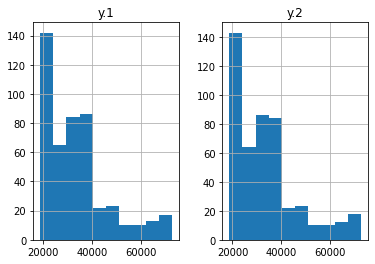

In [45]:
viz = cdf[['y.1','y.2']]
viz.hist()
plt.show()

In [46]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

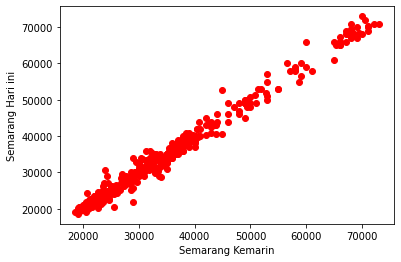

In [47]:
plt.scatter(cdf['y.1'], cdf['y.2'], color='red')
plt.xlabel('Semarang Kemarin')
plt.ylabel('Semarang Hari ini')
plt.show()

In [48]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['y.1']])
train_y = np.asanyarray(train[['y.2']])
regr.fit(train_x, train_y)
# The coefficients
print ('Koefisien: ', regr.coef_)
print ('intersepsi: ',regr.intercept_)

Koefisien:  [[0.99462191]]
intersepsi:  [198.29138494]


Text(0, 0.5, 'Semarang Hari ini')

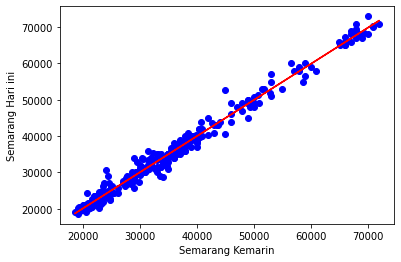

In [49]:
plt.scatter(train[['y.1']], train[['y.2']],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Semarang Kemarin")
plt.ylabel("Semarang Hari ini")

In [50]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['y.1']])
test_y = np.asanyarray(test[['y.2']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1282.99
Residual sum of squares (MSE): 3359291.28
R2-score: 0.98


# Pemodelan Regresi Linier Berganda untuk Estimasi Harga di Semarang 

Masih dengan jenis pangan 'Daging-9' atau daging ayam

Fungsi estimasi: y.2 = f(X) = x1.2 + x2.2 + x3.2 + x4.2 + x5.2

In [51]:
#1. Dari df_ready pilih kolom-kolom x
X = df_ready[['x1.2','x2.2','x3.2','x4.2','x5.2' ]]
X

,x1.2,x2.2,x3.2,x4.2,x5.2
30-09-2020,24000,20000,20000,25000,25000
03-08-2020,24000,22000,30000,25000,30000
04-08-2020,20000,22000,25000,25000,30000
05-08-2020,22000,20000,25000,25000,28000
06-08-2020,20000,20000,25000,25000,30000
...,...,...,...,...,...
23-09-2020,24000,20000,24000,25000,25000
24-09-2020,24000,20000,24000,25000,25000
25-09-2020,19000,18000,24000,24000,25000
28-09-2020,22000,18000,20000,25000,25000


In [52]:
y = df_ready[['y.2']]
y

,y.2
30-09-2020,22800
03-08-2020,26200
04-08-2020,24400
05-08-2020,24000
06-08-2020,24000
...,...
23-09-2020,23600
24-09-2020,23600
25-09-2020,22000
28-09-2020,22000


In [53]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(len(x_train))
print(len(y_train))

377
377


In [54]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [55]:
y_prediction =  LR.predict(x_test)
y_prediction

array([[35000.],
       [23600.],
       [53000.],
       [41000.],
       [35000.],
       [67400.],
       [23800.],
       [30400.],
       [71000.],
       [19600.],
       [21600.],
       [34000.],
       [28400.],
       [53000.],
       [70000.],
       [22400.],
       [30000.],
       [20000.],
       [37200.],
       [34000.],
       [53000.],
       [48000.],
       [38000.],
       [59000.],
       [26200.],
       [22000.],
       [68000.],
       [35000.],
       [22800.],
       [46000.],
       [32000.],
       [65200.],
       [69000.],
       [20200.],
       [33800.],
       [37000.],
       [43800.],
       [23200.],
       [29000.],
       [33400.],
       [24000.],
       [20000.],
       [28400.],
       [49000.],
       [34000.],
       [37000.],
       [23200.],
       [32600.],
       [40400.],
       [19000.],
       [23600.],
       [23200.],
       [43000.],
       [33000.],
       [20200.],
       [20200.],
       [20200.],
       [27000.],
       [35000.

In [56]:
# The coefficients
print ('Koefisien: ', LR.coef_)
print ('intersepsi: ',LR.intercept_)

Koefisien:  [[0.2 0.2 0.2 0.2 0.2]]
intersepsi:  [0.]


In [57]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  1.0
mean_sqrd_error is== 4.6670400876676086e-23
root_mean_squared error of is== 6.831573821358889e-12


r2 score bernilai 1, artinya 

In [58]:
train_x.shape

(382, 1)

In [59]:
train_y.shape

(382, 1)

Karena multivariat, tidak bisa diplot ke peta dua dimensi. Alternatifnya, cari variabel yang berkorelasi kuat dengan y.2

In [184]:
cdf = mengkonversi_tipe_DF(['x1.2','x2.2','x3.2','x4.2','x5.2','y.2' ], df_ready)
cdf = membuat_dataset_final(list_tanggal, cdf)

x1.2
x2.2
x3.2
x4.2
x5.2
y.2
Dataset sudah disort datetimeindex karena bersifat timeseries


In [185]:
cdf.dtypes

x1.1    object
x1.2     int64
x2.1    object
x2.2     int64
x3.1    object
x3.2     int64
x4.1    object
x4.2     int64
x5.1    object
x5.2     int64
y.1      int64
y.2      int64
dtype: object

In [186]:
cdf.corr()

,x1.2,x2.2,x3.2,x4.2,x5.2,y.1,y.2
x1.2,1.000000,0.952643,0.951359,0.949855,0.952640,0.973737,0.978874
x2.2,0.952643,1.000000,0.972072,0.952070,0.964422,0.976025,0.984904
x3.2,0.951359,0.972072,1.000000,0.948373,0.969592,0.974211,0.985262
x4.2,0.949855,0.952070,0.948373,1.000000,0.952187,0.976636,0.978355
x5.2,0.952640,0.964422,0.969592,0.952187,1.000000,0.975681,0.984825
y.1,0.973737,0.976025,0.974211,0.976636,0.975681,1.000000,0.992800
y.2,0.978874,0.984904,0.985262,0.978355,0.984825,0.992800,1.000000


array([[<AxesSubplot:title={'center':'x1.2'}>,
        <AxesSubplot:title={'center':'x2.2'}>,
        <AxesSubplot:title={'center':'x3.2'}>],
       [<AxesSubplot:title={'center':'x4.2'}>,
        <AxesSubplot:title={'center':'x5.2'}>,
        <AxesSubplot:title={'center':'y.1'}>],
       [<AxesSubplot:title={'center':'y.2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

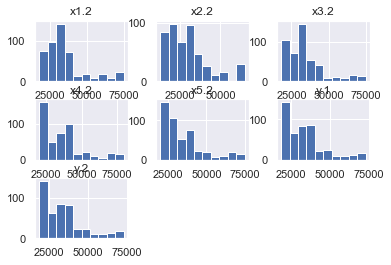

In [187]:

cdf.hist(['x1.2','x2.2','x3.2','x4.2','x5.2','y.1','y.2' ])

In [188]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
sns.set_theme(color_codes=True)

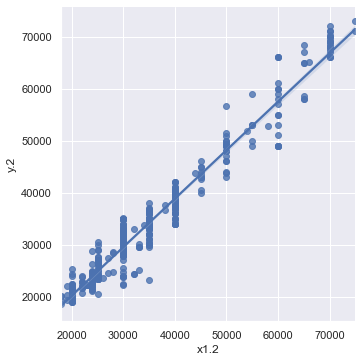

In [190]:
# Memplot salah satu x, yaitu x1.2 dengan y.2
sns.lmplot(x="x1.2", y="y.2", data=cdf);

<AxesSubplot:xlabel='y.1', ylabel='y.2'>

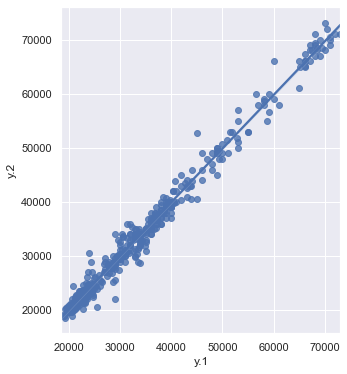

In [191]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="y.1", y="y.2", data=cdf, ax=ax)

<AxesSubplot:xlabel='tanggal', ylabel='y.2'>

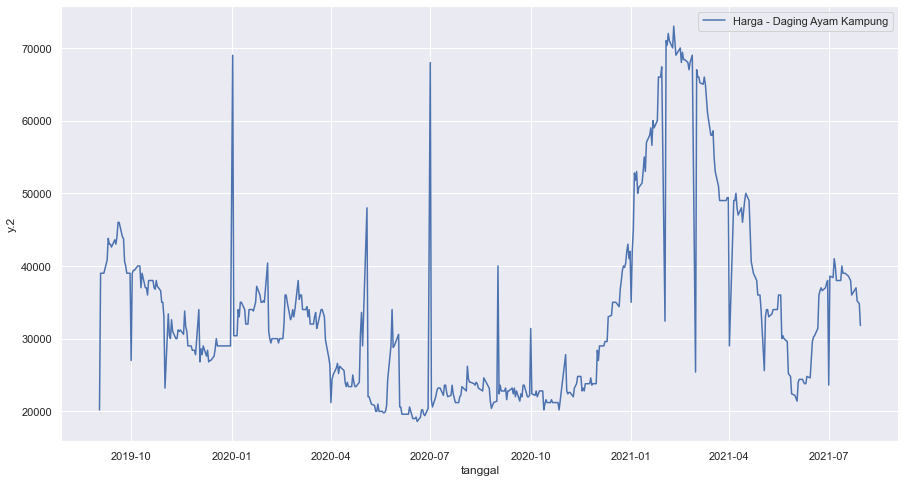

In [192]:
plt.figure(figsize = (15,8))
idx, nama_barang = kamus_kode_nama[namabarang_dicari]
labelnya = 'Harga ' + nama_barang
sns.lineplot(x = cdf.index, y = cdf['y.2'],data = df_ready, label=labelnya)

In [193]:
kamus_kode_nama[namabarang_dicari]


(20, '- Daging Ayam Kampung')

<Figure size 1800x720 with 0 Axes>

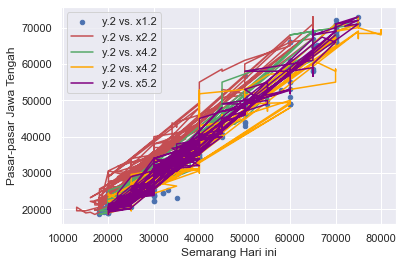

In [194]:
plt.figure(figsize = (25,10))
ax = cdf.plot(kind="scatter", x="x1.2",y="y.2", color="b", label="y.2 vs. x1.2")
cdf.plot(x="x2.2",y="y.2", color="r", label="y.2 vs. x2.2", ax=ax)
cdf.plot( x="x3.2",y="y.2", color="g", label="y.2 vs. x4.2", ax=ax)
cdf.plot( x="x4.2",y="y.2", color="orange", label="y.2 vs. x4.2", ax=ax)
cdf.plot( x="x5.2",y="y.2", color="purple", label="y.2 vs. x5.2", ax=ax)

ax.set_xlabel("Semarang Hari ini")
ax.set_ylabel("Pasar-pasar Jawa Tengah")
plt.show()

<AxesSubplot:xlabel='tanggal'>

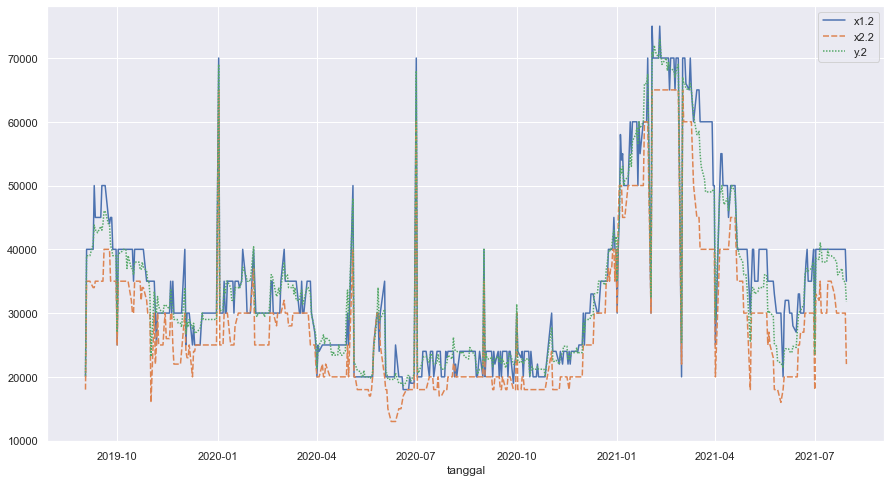

In [195]:
plt.figure(figsize = (15,8))
sns.lineplot(data=cdf[['x1.2','x2.2','y.2']])

Plot beberapa x saja (x1 dan x2 thd y2)

In [196]:
dict_variabel_barang

{3: ('x1.1', 'P.Karangayu kemarin'),
 4: ('x1.2', 'P.Karangayu hari ini'),
 7: ('x2.1', 'P.JMAJT kemarin'),
 8: ('x2.2', 'P.JMAJT hari ini'),
 11: ('x3.1', 'P.Gayamsari kemarin'),
 12: ('x3.2', 'P.Gayamsari hari ini'),
 15: ('x4.1', 'P.Peterongan kemarin'),
 16: ('x4.2', 'P.Peterongan kemarin'),
 19: ('x5.1', 'P.Bulu kemarin'),
 20: ('x5.2', 'P.Bulu hari ini'),
 23: ('y.1', 'Semarang kemarin'),
 24: ('y.2', 'Semarang hari ini')}

# Trend dari Harga

# Metode regresi linier (berganda) 


Fungsi estimasi: y.2 = f(X) = x1.2 + x2.2 + x3.2 + x4.2 + x5.2


In [197]:
df1 = membuat_dataset_final(list_tanggal, cdf)
df1.head()

Dataset sudah disort datetimeindex karena bersifat timeseries


,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
tanggal,,,,,,,,,,,,
2019-09-02,33000,30000,18000,18000,20000,20000,30000,30000,25000,26000,25200,24800
2019-09-03,30000,30000,18000,18000,20000,20000,30000,20000,26000,24000,24800,22400
2019-09-04,30000,30000,18000,16000,20000,20000,20000,20000,24000,25000,22400,22200
2019-09-05,19000,20000,18000,18000,20000,20000,20000,25000,25000,24000,20400,21400
2019-09-06,35000,30000,16000,20000,20000,25000,20000,20000,25000,25000,23200,24000


In [256]:
#split into train and validation
persen = 0.65
persenTrain = int(persen * df1.shape[0])
print(persen * 100, '% data: ', persenTrain)

train = df1[:persenTrain]
valid = df1[persenTrain:]

x_train = train.drop(['x1.1','x2.1','x3.1','x4.1','x5.1','y.1','y.2'], axis=1)
y_train = train[['y.2']]
x_valid = valid.drop(['x1.1','x2.1','x3.1','x4.1','x5.1','y.1','y.2'], axis=1)
y_valid = valid[['y.2']]

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
x_train

65.0 % data:  306


,x1.2,x2.2,x3.2,x4.2,x5.2
tanggal,,,,,
2019-09-02,30000,18000,20000,30000,26000
2019-09-03,30000,18000,20000,20000,24000
2019-09-04,30000,16000,20000,20000,25000
2019-09-05,20000,18000,20000,25000,24000
2019-09-06,30000,20000,25000,20000,25000
...,...,...,...,...,...
2020-11-20,60000,50000,65000,65000,65000
2020-11-23,65000,45000,60000,70000,50000
2020-11-24,65000,45000,50000,70000,60000


In [257]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

2.9207743740180243e-12

In [258]:
persenTrain

306

C:\Users\Riza\AppData\Local\Temp/ipykernel_7300/18148276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
C:\Users\Riza\AppData\Local\Temp/ipykernel_7300/18148276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


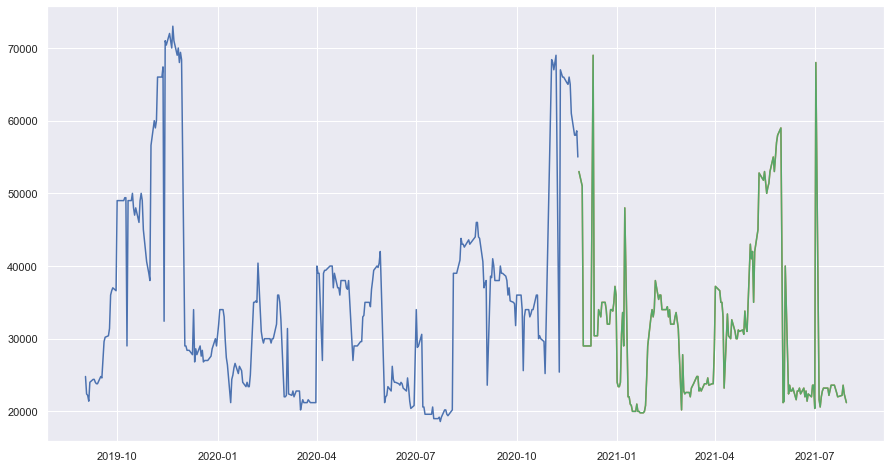

In [259]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = df1[persenTrain:].index
train.index = df1[:persenTrain].index

plt.figure(figsize = (15,8))
plt.plot(train[['y.2']])
plt.plot(valid[['y.2', 'Predictions']])

Chart di atas menunjukkan bahwa menggunakan harga hari ini di pasar-pasar Jateng (xi.2), i = 1..5, memprediksi harga hari ini (y.2) dengan regresi liner berganda sama dengan trend nilai y.2 yang sebenarnya

Regresi liner sederhana antara y.2 sebagai variabel diprediksi, dan y.1 sebagai variabel pemrediksi (y = ax + b)

In [260]:
#split into train and validation
train = df1[:persenTrain]
valid = df1[persenTrain:]

x_train = train[['y.1']]
y_train = train[['y.2']]
x_valid = valid[['y.1']]
y_valid = valid[['y.2']]

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

x_train

,y.1
tanggal,
2019-09-02,25200
2019-09-03,24800
2019-09-04,22400
2019-09-05,20400
2019-09-06,23200
...,...
2020-11-20,65000
2020-11-23,61000
2020-11-24,58000


rms:  1659.3426379769387


C:\Users\Riza\AppData\Local\Temp/ipykernel_7300/3133416892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
C:\Users\Riza\AppData\Local\Temp/ipykernel_7300/3133416892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


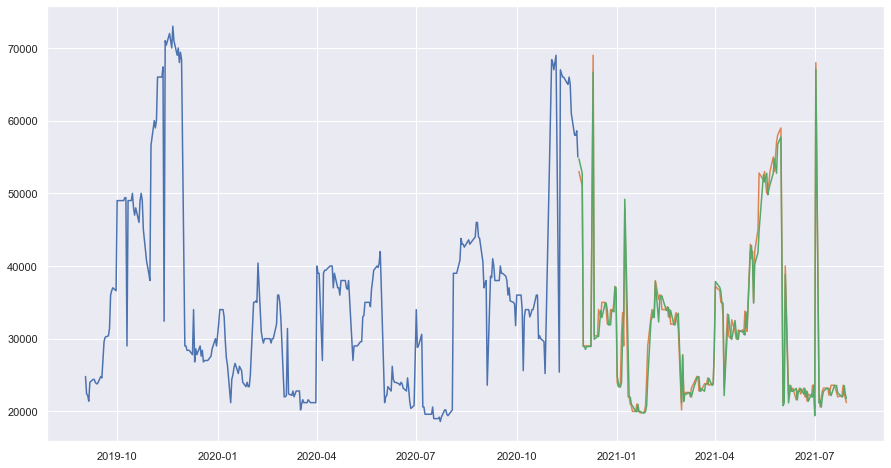

In [261]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('rms: ', rms)

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = df1[persenTrain:].index
train.index = df1[:persenTrain].index

plt.figure(figsize = (15,8))
plt.plot(train[['y.2']])
plt.plot(valid[['y.2', 'Predictions']])

Chart di atas menunjukkan bahwa menggunakan harga kemarin (y.1), memprediksi harga hari ini (y.2) dengan regresi liner sederhana sama dengan trend nilai y.2 yang sebenarnya

# Metode Arima (Autoregressive integrated moving average)

In [262]:
# Install hanya jika pmdarima belum diinstall
# !pip install pmdarima --user

In [263]:
# Sudah terurut tanggal krn indexnya timeseries
train = df1[:persenTrain]
valid = df1[persenTrain:]
train.head()

,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
tanggal,,,,,,,,,,,,
2019-09-02,33000,30000,18000,18000,20000,20000,30000,30000,25000,26000,25200,24800
2019-09-03,30000,30000,18000,18000,20000,20000,30000,20000,26000,24000,24800,22400
2019-09-04,30000,30000,18000,16000,20000,20000,20000,20000,24000,25000,22400,22200
2019-09-05,19000,20000,18000,18000,20000,20000,20000,25000,25000,24000,20400,21400
2019-09-06,35000,30000,16000,20000,20000,25000,20000,20000,25000,25000,23200,24000


In [265]:
training = train[['y.2']]
validation = valid[['y.2']]

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=166)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6239.707, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6102.951, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6216.709, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6093.590, Time=0.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=6082.289, Time=1.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=6081.843, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=1.69 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6057.564, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=6098.338, T

In [266]:
rms=np.sqrt(np.mean(np.power((np.array(valid[['y.2']])-np.array(forecast[['Prediction']])),2)))
rms

47747.540034870355

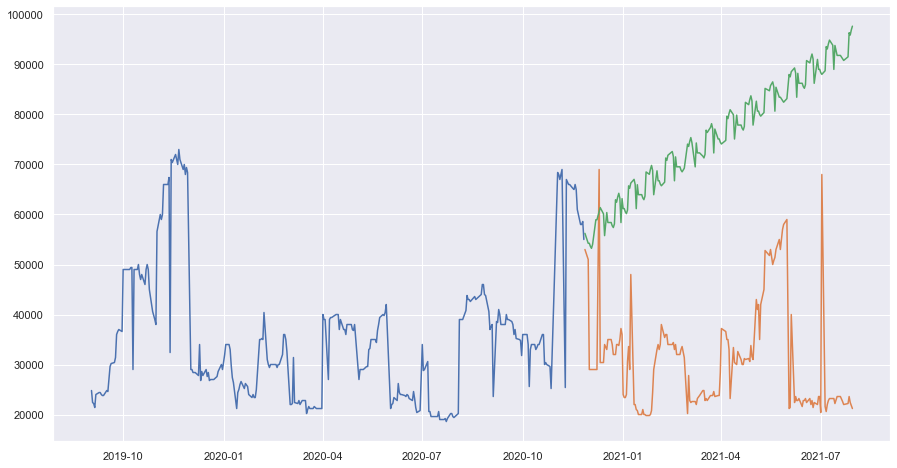

In [267]:
#plot
plt.figure(figsize = (15,8))
plt.plot(train[['y.2']])
plt.plot(valid[['y.2']])
plt.plot(forecast['Prediction'])

# Metode Long Short Term Memory (LSTM)

In [268]:
# Kita tetap pakai df1 sebagai data awal krn sudah terindeks datetime
df1.head()

,x1.1,x1.2,x2.1,x2.2,x3.1,x3.2,x4.1,x4.2,x5.1,x5.2,y.1,y.2
tanggal,,,,,,,,,,,,
2019-09-02,33000,30000,18000,18000,20000,20000,30000,30000,25000,26000,25200,24800
2019-09-03,30000,30000,18000,18000,20000,20000,30000,20000,26000,24000,24800,22400
2019-09-04,30000,30000,18000,16000,20000,20000,20000,20000,24000,25000,22400,22200
2019-09-05,19000,20000,18000,18000,20000,20000,20000,25000,25000,24000,20400,21400
2019-09-06,35000,30000,16000,20000,20000,25000,20000,20000,25000,25000,23200,24000


In [269]:
df2 = df1[['y.2']]
df2
train = df2[0:persenTrain:]
train

,y.2
tanggal,
2019-09-02,24800
2019-09-03,22400
2019-09-04,22200
2019-09-05,21400
2019-09-06,24000
...,...
2020-11-20,61000
2020-11-23,58000
2020-11-24,58000


In [270]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df2 = df1[['y.2']]

#splitting train n valid from main DF
train = df2[0:persenTrain:]
valid = df2[persenTrain::]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2)
x_train, y_train = [], []

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = df2[len(df2) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
harga_besok = model.predict(X_test)
harga_besok = scaler.inverse_transform(harga_besok)

Epoch 1/5
246/246 - 5s - loss: 0.0310
Epoch 2/5
246/246 - 3s - loss: 0.0256
Epoch 3/5
246/246 - 3s - loss: 0.0193
Epoch 4/5
246/246 - 3s - loss: 0.0191
Epoch 5/5
246/246 - 3s - loss: 0.0168


In [271]:
X_test.shape

(166, 60, 1)

In [272]:
rms=np.sqrt(np.mean(np.power((valid-harga_besok),2)))
rms

y.2    7866.713309
dtype: float64

C:\Users\Riza\AppData\Local\Temp/ipykernel_7300/930506714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = harga_besok


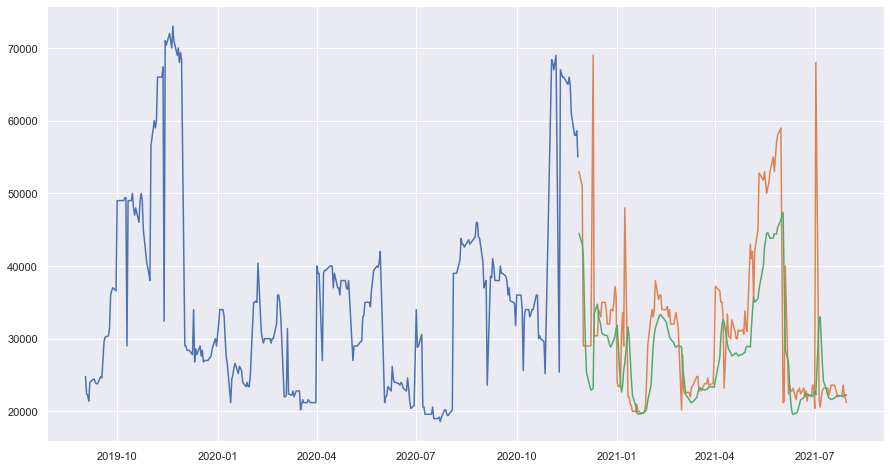

In [273]:
plt.figure(figsize = (15,8))
valid['Predictions'] = harga_besok
plt.plot(train['y.2'])
plt.plot(valid[['y.2','Predictions']])